<a href="https://colab.research.google.com/github/Vladgula/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [ ]:
# преобразовать категориальные признаки в category
df.Parental_Involvement = df.Parental_Involvement.astype('category')
df['Access_to_Resources'] = df['Access_to_Resources'].astype('category')
df['Motivation_Level'] = df['Motivation_Level'].astype('category')
df['Family_Income'] = df['Family_Income'].astype('category')
df['Teacher_Quality'] = df['Teacher_Quality'].astype('category')
df['Peer_Influence'] = df['Peer_Influence'].astype('category')
df['Parental_Education_Level'] = df['Parental_Education_Level'].astype('category')
df['Distance_from_Home'] = df['Distance_from_Home'].astype('category')
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].astype('category')
df['Internet_Access'] = df['Internet_Access'].astype('category')
df['School_Type'] = df['School_Type'].astype('category')
df['Learning_Disabilities'] = df['Learning_Disabilities'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [ ]:
num_features = X.select_dtypes(include=['int64']).columns
cat_features = X.select_dtypes(include=['category']).columns

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df['Exam_Score']
X = df.drop('Exam_Score', axis=1)

In [ ]:
# Пропуски

print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
# Заполним пропуски в категориальных признаках

X[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = X[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].apply(lambda x: x.fillna(x.mode()[0]))

## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

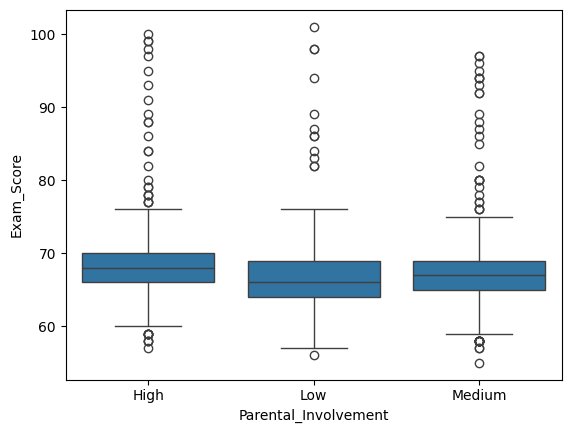

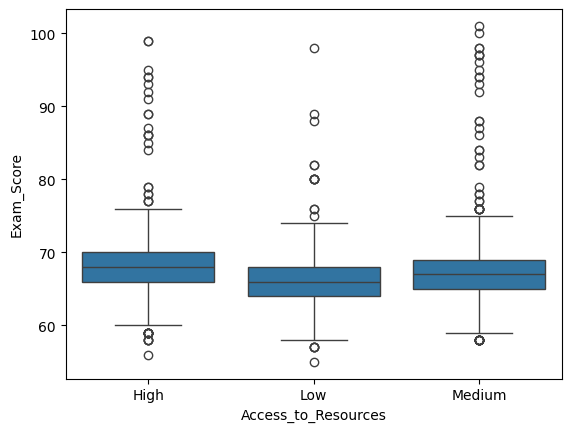

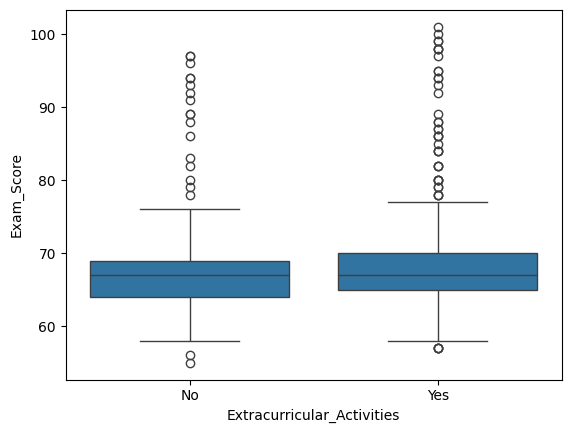

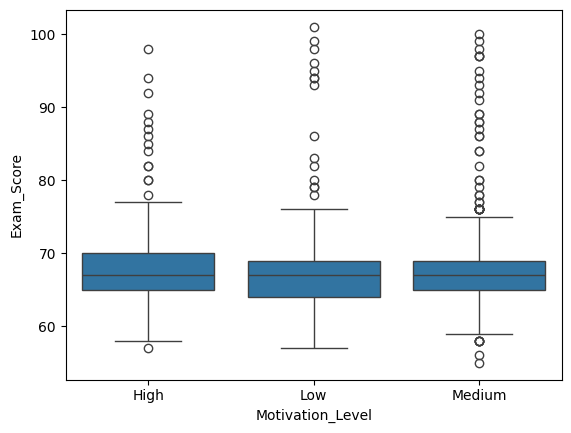

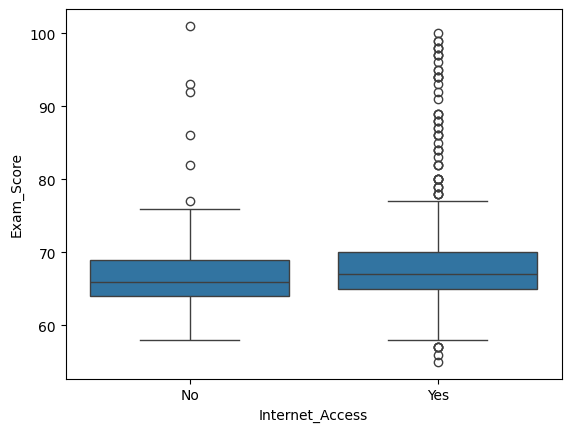

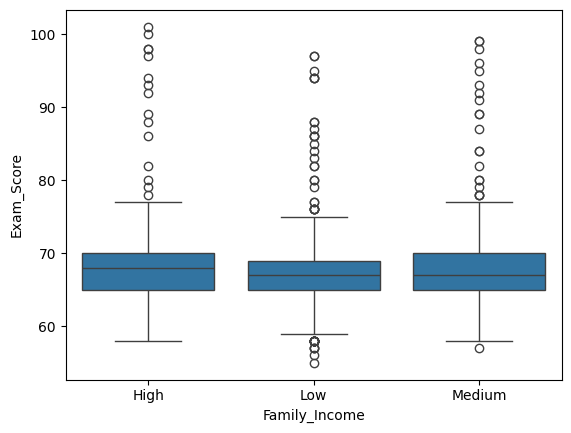

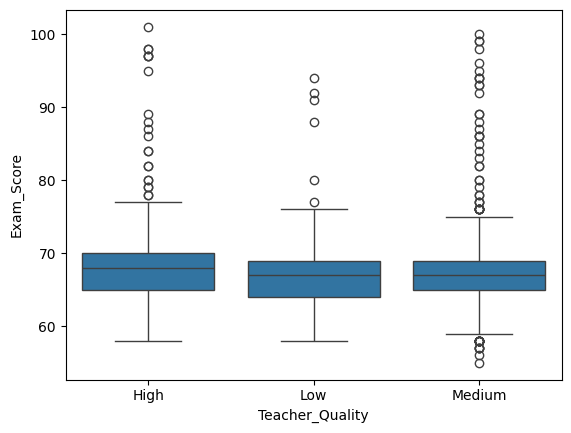

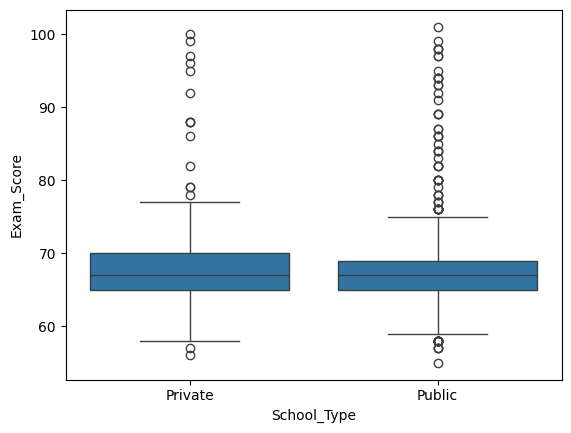

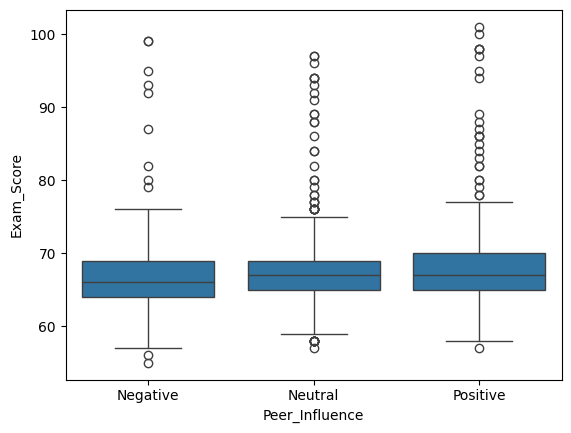

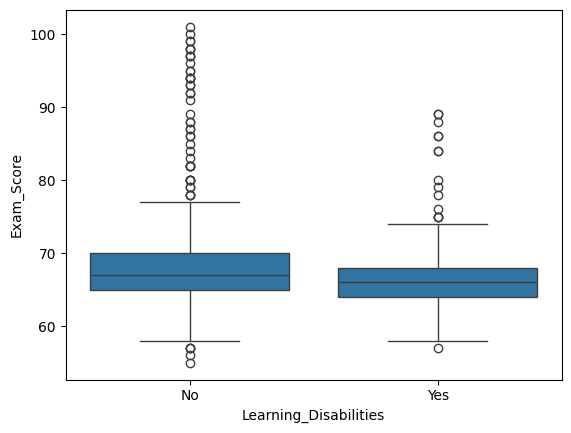

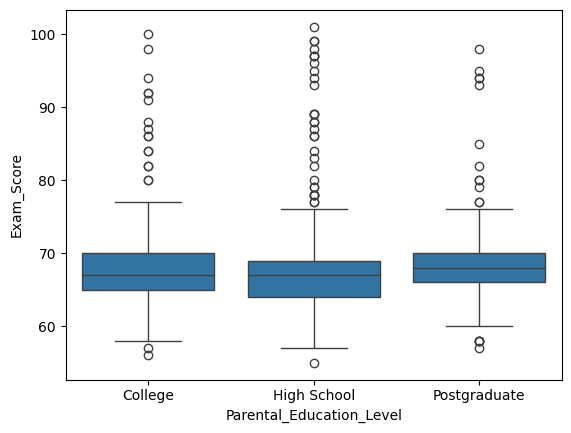

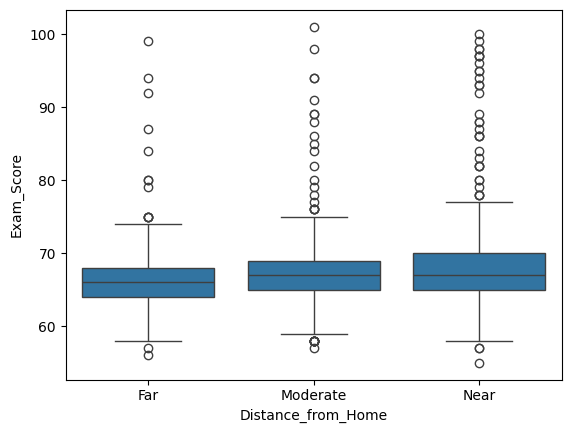

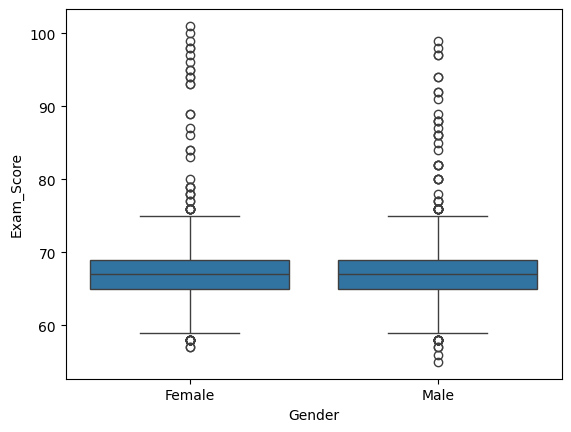

In [ ]:
# Категориальные признаки и Y

for feature in cat_features:
    plt.figure()
    sns.boxplot(data=df, x=feature, y=y)
    plt.show()

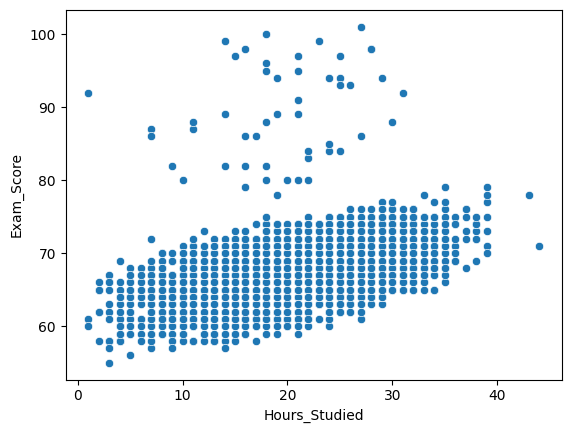

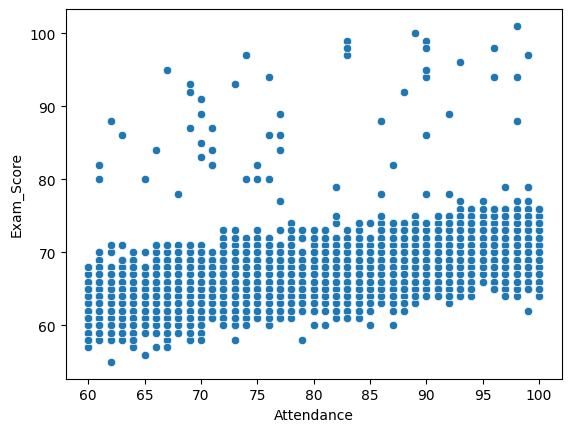

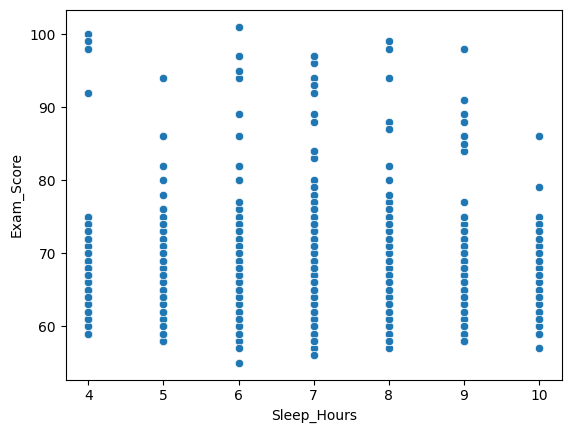

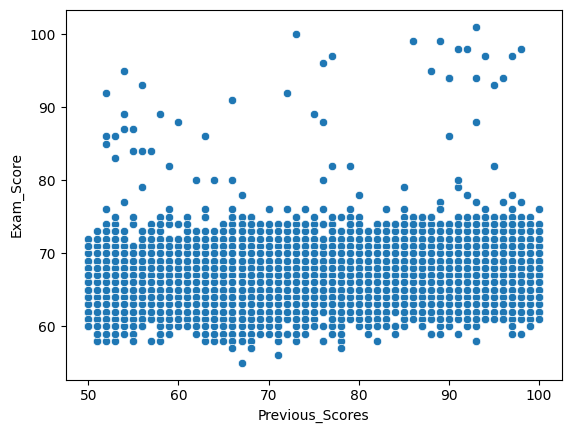

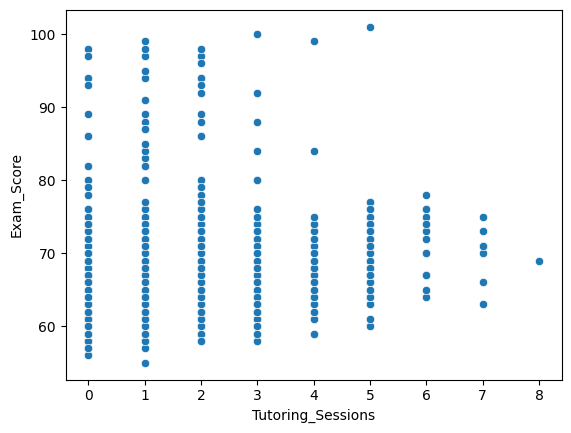

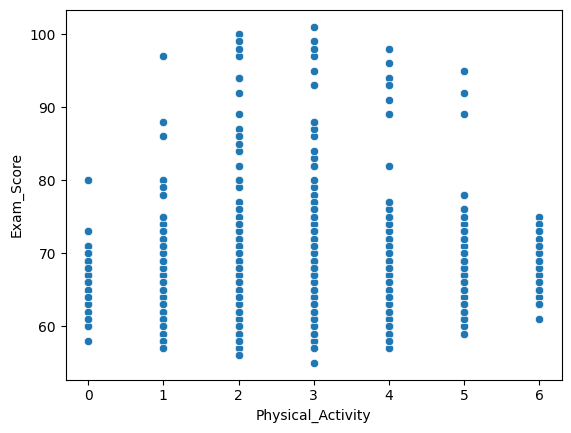

In [ ]:
# Числовые признаки и Y

for feature in num_features:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y=y)
    plt.show()

In [ ]:
# Кодирование OneHotEncoder для категориальных признаков

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[cat_features])


In [ ]:
# Создаем DataFrame с закодированными признаками

encoded_columns = encoder.get_feature_names_out(cat_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=num_features)


In [ ]:
X_processed = pd.concat([X_scaled_df, X_encoded_df], axis=1)

In [ ]:
categorial_features = [] # перечислить названия колонок с категориальными фичами
numeric_features = [] # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [ ]:
# Метрики

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
def print_metrics(y_true, y_pred, name=""):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{name} - MAE: {mae:.2f}, MAPE: {mape:.2f}%, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")

In [ ]:
# Модель 1

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_processed, y)
y_pred1 = model1.predict(X_processed)

print_metrics(y, y_pred1, "Все признаки, вся выборка")

Все признаки, вся выборка - MAE: 0.48, MAPE: 0.65%, MSE: 4.13, RMSE: 2.03, R2: 0.727


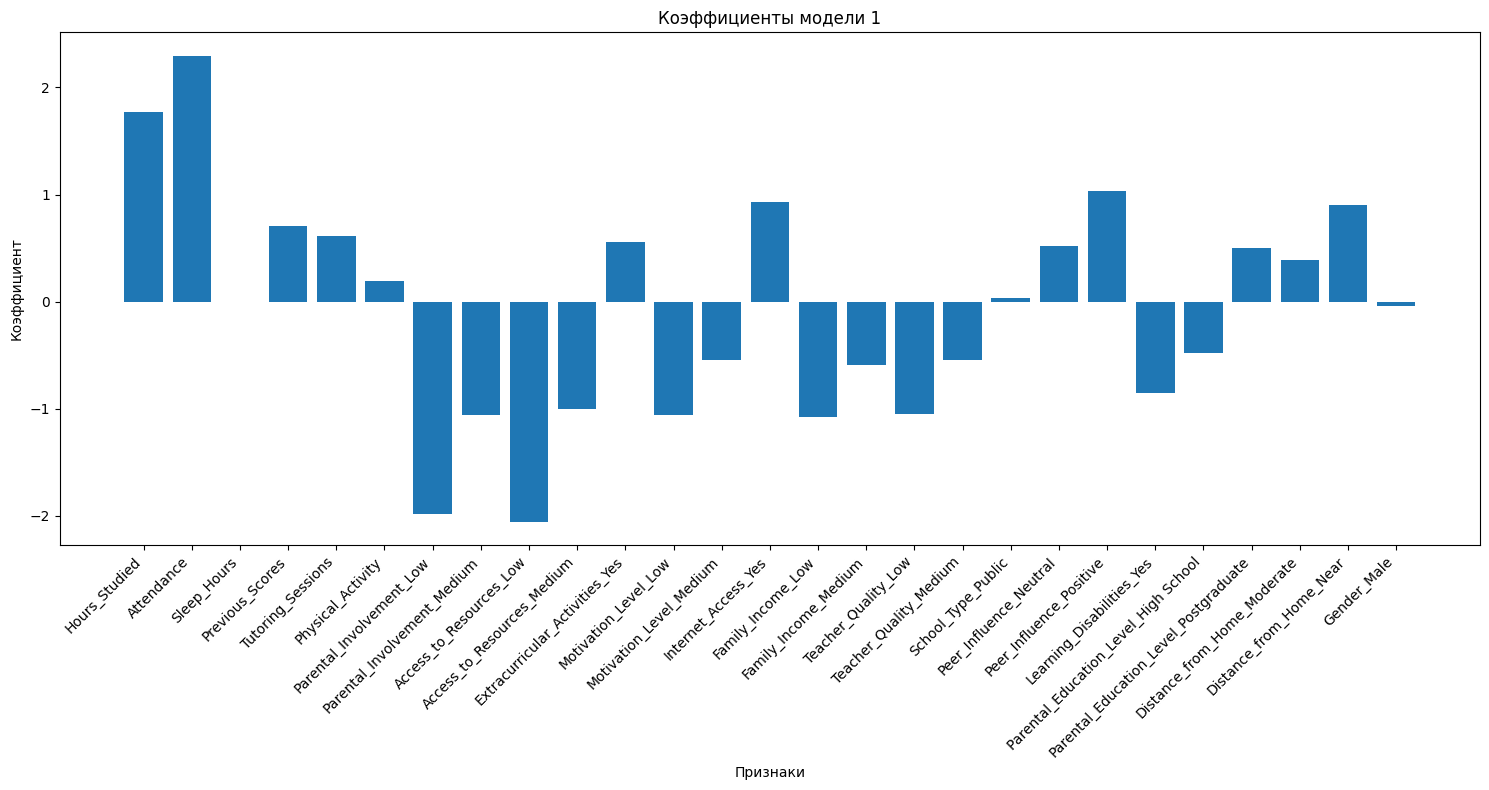

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  # Увеличиваем размер для читаемости
plt.bar(range(len(model1.coef_)), model1.coef_)
plt.title('Коэффициенты модели 1')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
feature_names = X_processed.columns.tolist()  # названия колонок
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')  # Поворот 45 градусов для подписей

plt.tight_layout()  # Чтобы подписи не обрезались
plt.show()

In [ ]:
# Модель 2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

print_metrics(y_train, y_train_pred2, "Train (все признаки)")
print_metrics(y_test, y_test_pred2, "Test (все признаки)")

Train (все признаки) - MAE: 0.50, MAPE: 0.68%, MSE: 4.35, RMSE: 2.09, R2: 0.717
Test (все признаки) - MAE: 0.45, MAPE: 0.63%, MSE: 3.26, RMSE: 1.80, R2: 0.770


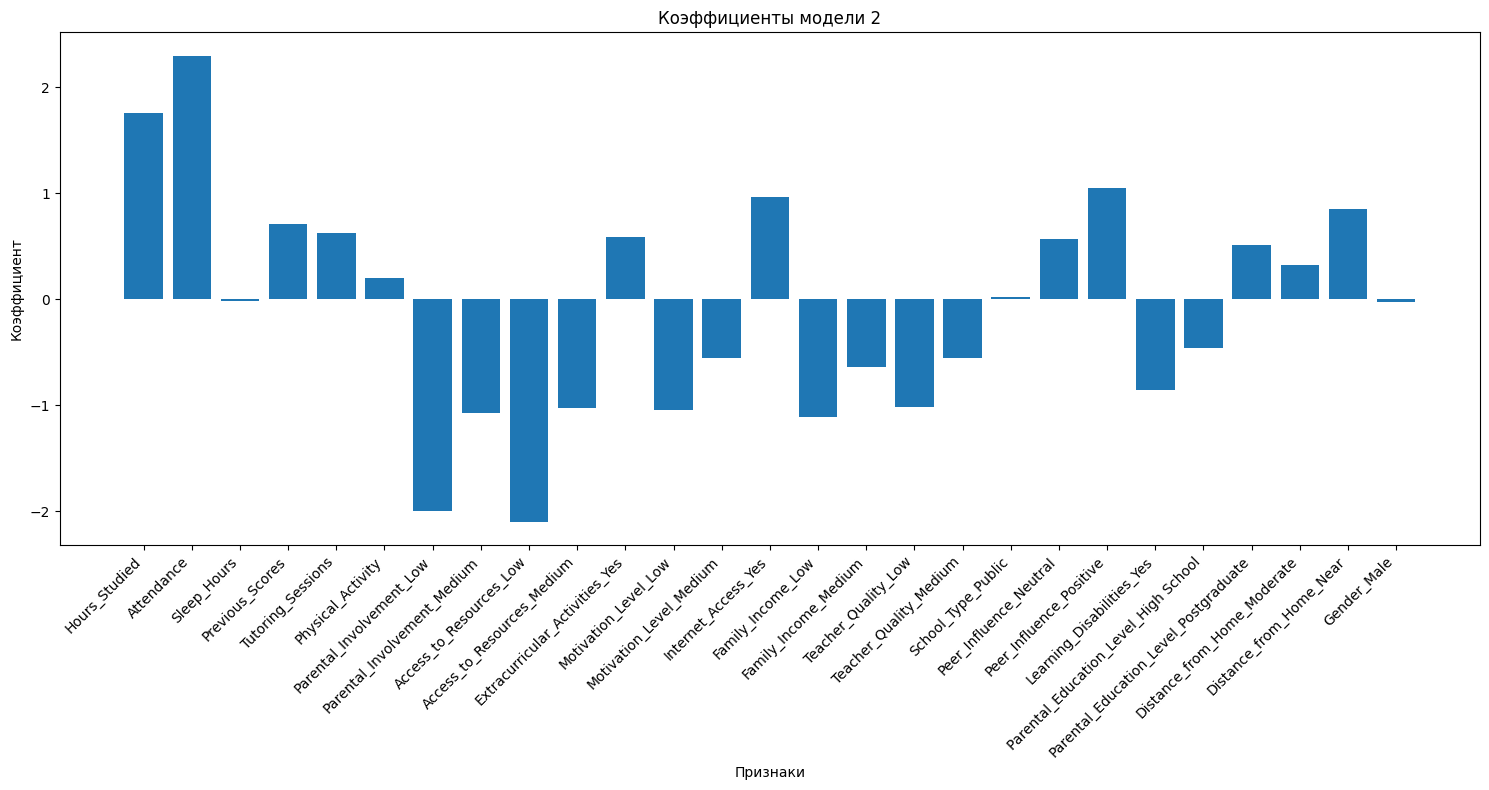

In [ ]:

plt.figure(figsize=(15, 8))
plt.bar(range(len(model2.coef_)), model2.coef_)
plt.title('Коэффициенты модели 2')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')

feature_names = X_processed.columns.tolist()  # названия колонок
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Модель 3

best_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Parental_Involvement_Low', 'Parental_Involvement_Medium']

# Оставляем только best_features
X_best_processed = X_processed[best_features]

model3 = LinearRegression()
model3.fit(X_best_processed, y)
y_pred3 = model3.predict(X_best_processed)

print_metrics(y, y_pred3, "Best features, вся выборка")


Best features, вся выборка - MAE: 1.30, MAPE: 1.88%, MSE: 6.02, RMSE: 2.45, R2: 0.602


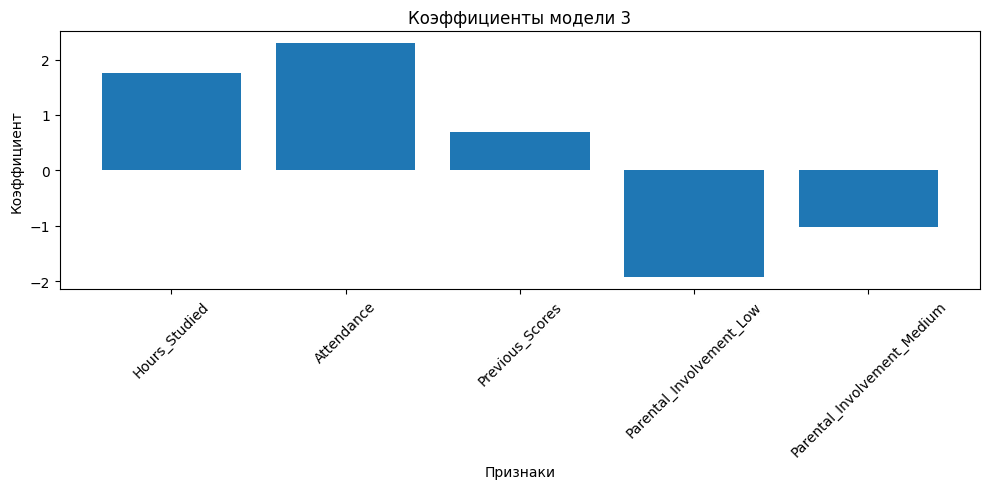

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(model3.coef_)), model3.coef_)
plt.xticks(range(len(best_features)), best_features, rotation=45)
plt.title('Коэффициенты модели 3')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.tight_layout()
plt.show()

In [ ]:
# Модель 4

X_best_train, X_best_test, y_best_train, y_best_test = train_test_split(
    X_best_processed, y, test_size=0.2, random_state=42)

model4 = LinearRegression()
model4.fit(X_best_train, y_best_train)

y_best_train_pred = model4.predict(X_best_train)
y_best_test_pred = model4.predict(X_best_test)

print_metrics(y_best_train, y_best_train_pred, "Train (best features)")
print_metrics(y_best_test, y_best_test_pred, "Test (best features)")

Train (best features) - MAE: 1.31, MAPE: 1.90%, MSE: 6.29, RMSE: 2.51, R2: 0.591
Test (best features) - MAE: 1.25, MAPE: 1.82%, MSE: 4.92, RMSE: 2.22, R2: 0.652


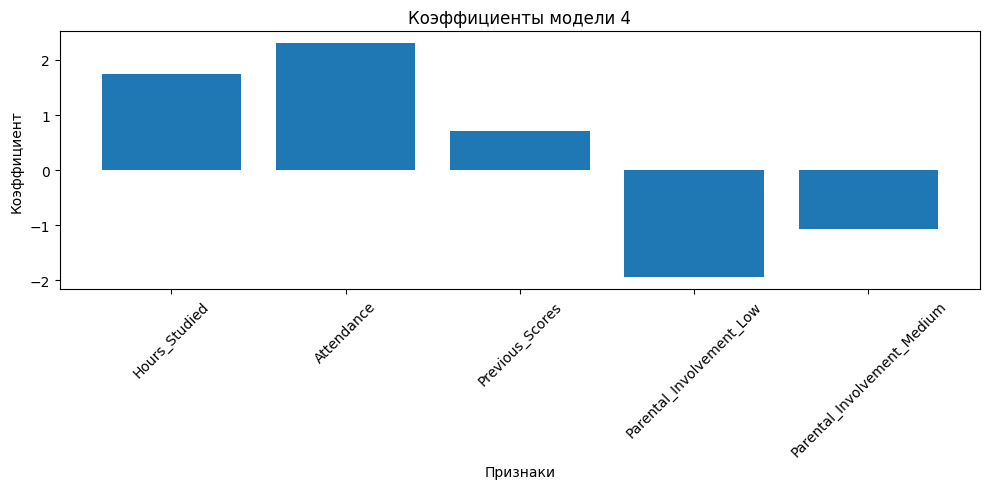

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(model4.coef_)), model4.coef_)
plt.xticks(range(len(best_features)), best_features, rotation=45)
plt.title('Коэффициенты модели 4')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.tight_layout()
plt.show()

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

KeyError: "None of [Index(['YOU_VARIABLE_NAME'], dtype='object')] are in the [columns]"

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест